In [2]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pylab as plt1
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [3]:
with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)
y = np.array(train['labels'], dtype=float)
x = np.array(train['data'], dtype=float)  

a = x.shape[0]
k = 2000

xtest = np.zeros((k, x.shape[1]))
ytest = np.zeros(k)
xtrain = np.zeros((a - k, x.shape[1]))
ytrain = np.zeros(a - k)

b = int(a/k)
k1 = 0
k2 = 0

for i in range(x.shape[0]):
    if (i+1)%b == 0:
        xtest[k1] = x[i]
        ytest[k1] = y[i]
        k1 += 1
    else:
        xtrain[k2] = x[i]
        ytrain[k2] = y[i]
        k2 += 1

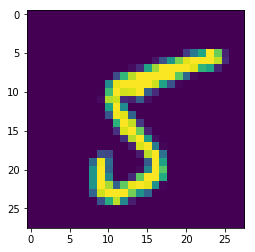

In [4]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))


# Обучаем модель

In [5]:
print(ytrain)

[5. 5. 6. ... 6. 6. 5.]


In [6]:
# Реализуйте здесь обучение модели
# Создание картинки из 0 и 1, при нормализации на 128, для тренировачных моделе
xtrain = xtrain / 255
xtest  = xtest / 255

In [7]:
f = 0
for j in range (ytrain.shape[0]):
    if ytrain[j] == 5:
        ytrain[j] = -1
    else: ytrain[j] = 1
        
for j in range (ytest.shape[0]):
    if ytest[j] == 5: ytest[j] = -1 
    else: ytest[j] = 1   

In [8]:
# Инициализируем веса случайны образом
np.random.seed(11)
w = np.random.normal(scale=0.001, size = xtrain.shape[1])


In [9]:
def lgloss (xt, yt, f):
    return math.log(1 + math.exp( -yt * np.dot(f, xt)))

In [10]:
def logloss(xt, yt, n, w, k):
# Накапливаем лосс
    loss_acc = 0
    for i in range(xt.shape[0]):
        j = np.random.randint(0, xt.shape[0])
        loss_acc += lgloss(xt[j],yt[j],w)
        
#         if (((i + 1) % n) == 0):
#             loss.append(loss_acc / n)
#             loss_acc = 0
    return loss_acc/k

In [11]:
def accuracy (xt, yt, w, k):
    acc = 0
    t = 0
    
    for i in range(xt.shape[0]):
        j = np.random.randint(0, xt.shape[0])
        b = np.dot(w.T, xt[j])
        if b > 0:
            t = 1
        else:
            t = -1
        if yt[j] == t:
            acc += 1
    return acc/k

In [12]:
#Оцениваем веротяность результата
def Prob (xtest, w):
    return (1 /( 1 + (np.exp(-np.dot(w.T, xtest)))))

In [13]:
def Weight (xt, yt, w):    
    j = np.random.randint(0, xt.shape[0])          
    grad = - yt[j] * xt[j] / \
        ( 1 + np.exp( yt[j] * np.dot(w.T, xt[j]) ) ) + 0 * w
    w -= 0.0075 * grad  
    return w

In [14]:
# Массив для хранения лосса (усреднённых значений)
loss_train = []
accur_train = []
loss_test = []
accur_test = []
n = 100
#np.dot(w.T, xtrain[j]) - процесс перемножения матриц в библиотеке numpy
#Скорость обучения зависит от коэффицента перед градиентом 
#Поиск весов для каждого элемента матрицы через градиент потерь
#Расчёт градиента и весов   

for i in range(x.shape[0]):
    
    if ((((i + 1) % (x.shape[0]/k)) != 0)):
        w = Weight (xtrain, ytrain, w)
        
    if (((i + 1) % n) == 0):
        accur_train.append(accuracy(xtrain, ytrain, w, xtrain.shape[0]))
        loss_train.append(logloss(xtrain, ytrain, n, w, xtrain.shape[0]))
                           
        accur_test.append(accuracy(xtest, ytest, w, xtest.shape[0]))
        loss_test.append(logloss(xtest, ytest, n, w, xtest.shape[0]))
        
#     j = np.random.randint(0, xtrain.shape[0])          
#     grad = - ytrain[j] * xtrain[j] / \
#         ( 1 + np.exp( ytrain[j] * np.dot(w.T, xtrain[j]) ) ) + 0 * w
#     w -= 0.007 * grad  
    
#     if (((i + 1) % n) == 0):
#         accur_train.append(accuracy(xtrain, ytrain, w, xtrain.shape[0]))
#         loss_train.append(logloss(xtrain, ytrain, n, w, xtrain.shape[0]))
        
# for i in range(xtest.shape[0]):
    
#     j = np.random.randint(0, xtest.shape[0])          
#     grad = - ytest[j] * xtest[j] / \
#         ( 1 + np.exp( ytest[j] * np.dot(w.T, xtest[j]) ) ) + 0 * w
#     w -= 0.0001 * grad  
    
#     if (((i + 1) % n) == 0):
#         accur_test.append(accuracy(xtest, ytest, w, xtest.shape[0]))
#         loss_test.append(logloss(xtest, ytest, n, w, xtest.shape[0]))

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

0.0859611185269544


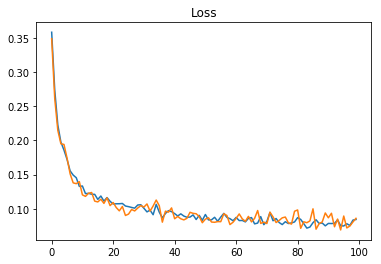

In [15]:

plt.title('Loss')
plt.plot([u for u in loss_train], label='train')
plt.plot([u for u in loss_test], label='test')
print(loss_test[-1])

0.984


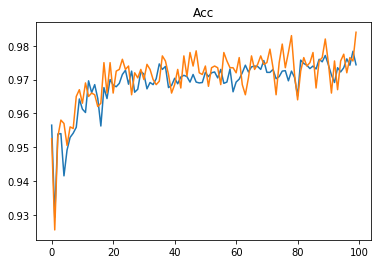

In [16]:
plt.title('Acc')
plt.plot([q for q in accur_train], label='train')
plt.plot([u for u in accur_test], label='test')
print(accur_test[-1])

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [17]:
X = test_no_lables['data']
X = X / 255
Y_pred = np.zeros(X.shape[0], dtype=float)
# compute Y_pred
for i in range(X.shape[0]):
    Y_pred[i] = Prob(X[i],w)
    print(Y_pred[i])
with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

0.9494930049018401
0.9931417501771439
0.9963303786131711
3.186725035876564e-05
0.057299432419408054
0.9988249723199564
0.0007419995178352901
0.001878188174627559
0.9914822642954279
0.990277910874885
0.9744988743136724
0.7934460102214226
0.0016132665993835984
0.0027472054654809138
0.009571502020412513
0.9212303685906078
0.9719975027937245
0.1480811805732383
0.00015680294569170883
0.46515501410013904
0.00028599938932943414
0.03192592405221783
0.03796025963440714
0.9994964798126457
0.0002989659386530179
0.04509970834497238
0.9628232244241745
0.4637675827648992
0.3636223792057115
0.9975968475354975
0.993972310597446
0.998980058128571
0.00013696841187876325
0.5052441529319721
0.9950639464242472
0.002184681934401366
0.9978064556236744
0.999131445019966
0.9967437867322124
0.7489385306395248
0.9981761081686105
0.01420385622457038
0.0030278805306712306
0.0015654509515360296
0.00923040258081422
0.00854550333585701
0.6945202118387782
0.7298345121736148
0.9988774705411576
0.9991040917321892
0.9417

0.9907943017275735
0.96499589945324
0.008247415171359166
0.9697866842627222
0.003158871924225118
0.002059431877543306
0.0001650200732465244
9.491420976153709e-05
0.011902270116489356
0.6871388317817715
0.9997825422320988
0.001295676866153618
0.9384004512662192
0.09306406394314953
0.9996642940055938
2.6432472719766455e-05
0.9944857491586129
0.01275974399496069
0.0001660821880983329
0.6694699546030232
0.9889733528133634
8.498664243100967e-06
0.011003548642380134
0.985524460695905
0.0009809543444317143
6.301043251736243e-05
0.9955146605906329
0.9986766986901392
5.662160900555157e-05
0.9670909861463406
0.99487373318163
0.9726248586869841
0.000980982004747158
0.005474689061488515
0.9989576053914847
0.000572671241137819
0.9995332997948316
0.9979974354098798
0.9759190581165621
0.00488434660490475
0.06196720173171835
0.988604609496787
0.0004553636440566546
0.001709293773809294
0.0007379786962992093
0.18314260839410448
0.014012018756676478
6.577597708794561e-07
8.577641197957494e-05
0.016140268

0.9997350935422631
0.01703403963815548
0.02213341659705872
0.9930301315094966
0.9954925602323468
0.22536419207099534
0.0006677933040413049
0.0010909391170453179
0.003498392919795114
0.9996506296111937
0.9714767583630808
0.9586549578233197
1.9554332778585207e-06
0.008439820213500992
0.7288709354424435
0.13574832678905285
0.8595967842513889
0.9928998206442237
0.9941032628574192
0.999806764590908
0.966170627867184
0.00026103755136904454
0.011233474748363816
0.9991342802933734
0.0007468848201967603
1.7756960892118047e-06
0.9994506178889336
0.9929608675884798
0.00012609735647908275
0.0003058167793298649
0.9122055598615847
0.020092644742955912
2.3887481827590542e-05
0.10222359251285983
0.11817662854363795
0.993220449933018
0.6864429171267301
6.459586654658578e-05
1.153919947091332e-05
0.33772171833116965
0.0035401301383466643
0.0925630402320679
0.9694722299055849
0.988441203794697
0.9151093849510734
0.0007389522685452776
0.009300606013501526
0.057112698268849287
0.000725573612040104
0.012116

0.001443263343616527
0.002603938374638222
0.9975267344708618
0.9986175554363185
1.3102495981824324e-05
0.9641055029951873
7.287191681879857e-05
0.9961630301597767
0.0003507077550179295
0.9955751339790782
0.9875511203961255
0.9968872081794065
0.9826309114192898
0.024073880311224937
0.9757312617936268
0.9997507574661522
0.0003081931130311202
0.006581249370933238
0.8504646045689818
0.9996681308381438
0.9851343438099329
0.9857108812655311
0.9979189696291929
0.967585915185533
0.19333591668176697
0.004200956427490109
0.00011265493252288582
0.9945830820315708
0.6441002870339737
0.9575721957050575
0.9900311216997628
0.9859628755216557
0.9996176820035464
0.8667556100011563
0.9999246432261367
0.956746418518113
0.008514837227325798
0.00022918450559972488
0.9921295787714368
0.1148594492813828
0.991131464610449
3.662135962748595e-05
0.00020617052450212295
0.1962025422541886
0.9768045225854775
0.00030975143109315643
3.633339340056358e-05
8.315836977154808e-05
0.9938284881585028
0.994561621891233
0.9

0.0376855141479359
0.005974941923340353
0.8061993379880203
0.7000352455954256
0.9818626546161044
0.9914756309159494
0.9971118878512716
0.010479896062295869
0.5903182126777821
0.9951372640779464
0.9976291535380184
0.00010087330935954802
0.9092100652695196
0.9965798035460961
0.9996785447646499
0.9991985381184266
0.001322469002114801
0.9946276290453641
0.06386886260450404
0.07232018695966633
0.03341232663639834
0.45131285943715177
9.125745448753346e-05
0.9995292071618923
0.997620261714112
0.008996688215790595
0.7035661131811951
0.9951112443063588
0.9546457124519341
0.0006283813172218536
0.009966399964008285
0.0025312369411633197
0.8608399965458439
0.9930337302395388
0.022645790185083812
0.009937743527588352
7.111471804322682e-05
0.9982440946027995
0.00011832216210212413
0.9955356866578957
0.9976743924918141
0.06440881326414338
9.035260641581725e-05
0.9462799031329462
0.9604459446375243
0.016585785625064974
0.013407874354397522
8.995042151692723e-06
0.989296168108025
0.0002880734520483607


0.9991596719449027
2.2187509228835675e-06
0.9969511631174246
1.4657031205673117e-05
0.00010088452810120371
0.031110625011779497
0.6602334303824707
0.9916290801221339
0.001136329987983571
0.004262715569548522
0.014804514338710323
0.00043589229798977457
0.002153686534475896
0.001113647011218668
2.7356474220084576e-06
0.8938473507423919
7.966733719832363e-05
0.9955641257960088
0.010265228616332221
0.9444306583771271
0.9990142853452016
4.153954554249892e-05
0.01561952770579155
0.8652286024555237
0.008129703523023507
0.9971639556427496
0.9960481210761472
0.0007845908507956799
0.9667468092183817
0.22736534765892827
0.5266162154796203
0.00984320573176543
0.6171162357629835
0.9951097230274121
0.0022375237312327323
0.9049919563426135
0.997646393988017
0.08546531025144129
0.010319528100519568
0.007091239864123197
6.593480985830722e-05
0.9891406354183907
0.997706959155204
0.0002381359986071626
0.0017514522338644793
0.8606396601872013
0.9991345468029807
2.3568528719979926e-05
0.9940185669923632
0.

0.001332505303573172
0.9689597821021868
0.00515160208470372
0.00778317557335424
0.7982291966702879
0.9988502101950782
0.3587221216396041
0.18334315952958793
5.5491473936349687e-05
0.9950525582048693
0.9868629168956392
0.9982645036587193
0.8754992922402305
0.9688183122631203
0.0004890533588535272
0.10813605965883477
0.6745551352840512
8.8906151004143e-05
0.5319028878712154
0.9993591794967428
0.960995442240955
1.010059791040918e-05
0.9996405399363867
0.41845604330670505
0.049678674279608176
0.9518995082885631
0.9953384133799487
0.9362600794827184
0.0023415504282172472
3.9798283236776996e-05
0.9983958139820901
0.9843141757629015
4.686824960574134e-05
0.5665860594603921
0.9989737848822794
0.9980876989155788
0.003207761863617633
0.0010127174904633234
0.9988299858667554
0.9964417217189325
0.002573831874252317
0.9862135544187741
0.9995126608700544
0.8931698705979525
0.989532940338059
0.8519526478504617
0.022030392377899034
0.002031829705757279
0.018182551500356123
0.9696228669357134
0.9994462

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




0.9930390287134332
0.035136017730270065
0.00020209045506539442
0.0019038660290475377
0.0005731089573043336
0.0023821035963556684
0.9985350137565558
0.0011274094779852675
0.9906782016167571
0.30530312545007915
0.0006633194871846964
0.05497955556114466
0.3054960858133158
0.9858636223150503
0.9983254885808645
0.9974064431133011
0.99683574941895
0.9987520686330676
0.000261277900756723
0.9925801489757969
0.9930316064406832
0.0015811504708010955
0.9487818175448668
0.984773028636767
0.012028177379989572
0.0003578295856107265
0.9846186490027449
0.07653442437426156
0.8662395749301204
0.005288355138358516
0.026698983305183548
6.327094243809911e-06


# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb